<details>
<summary> ✅ Week 1: Exploratory Data Analysis (EDA)
</summary>
</details>

<details>
<summary> ▶ Import libraries </summary>
</detail>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [2]:
pd.set_option('display.max_columns', None) # To show the full columns in the dataframe

In [3]:
diab_data = pd.read_csv("Dataset/diabetes_binary_health_indicators_BRFSS2015.csv")

<details>
<summary> ▶ Exploratory Data Analysis </summary>
</detail>

In [4]:
diab_data.shape


(253680, 22)

In [5]:
diab_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
diab_data.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [7]:
print(diab_data.columns.tolist())

['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [8]:
# check for missing values
diab_data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
# Check for duplicates in the dataset
diab_data[diab_data.duplicated()]
# diab_data.loc[diab_data.duplicated()] 

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [10]:
diab_data.dtypes # Incorrectly formatted features as float64, BMI is correct as float, other features are not

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [11]:
diab_data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<details>
<summary> ▶ Assigning features to a list </summary>
</detail>

In [12]:
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
ordinal_numeric_features = ['MentHlth', 'PhysHlth']
ordinal_categoric_features = ['GenHlth','Age', 'Education', 'Income']
numeric_features= ['BMI']

<details>
<summary> ▶ Check for constant or near constant features </summary>
</detail>

In [13]:
print ("Variance analysis for constant/ near-constant features:")
print ("-"*60)
variance_analysis = []
for col in diab_data.columns:
    unique_vals = diab_data[col].nunique()
    most_common_pct = diab_data[col].value_counts().iloc[0]/len(diab_data)*100
    variance = diab_data[col].var()
    variance_analysis.append({"features": col, "unique_values":unique_vals, "most_common_pct": most_common_pct, "variance":variance})
variance_df = pd.DataFrame(variance_analysis)
variance_df= variance_df.sort_values("most_common_pct", ascending = False)
print ("Features sorted by dominance most common value")
variance_df_display = variance_df.round(2)
print(variance_df_display)

Variance analysis for constant/ near-constant features:
------------------------------------------------------------
Features sorted by dominance most common value
                features  unique_values  most_common_pct  variance
3              CholCheck              2            96.27      0.04
6                 Stroke              2            95.94      0.04
12         AnyHealthcare              2            95.11      0.05
11     HvyAlcoholConsump              2            94.38      0.05
13           NoDocbcCost              2            91.58      0.08
7   HeartDiseaseorAttack              2            90.58      0.09
0        Diabetes_binary              2            86.07      0.12
17              DiffWalk              2            83.18      0.14
10               Veggies              2            81.14      0.15
8           PhysActivity              2            75.65      0.18
15              MentHlth             31            69.25     54.95
9                 Fruits        

<details>
<summary> ▶ Identify near-constant features (>95% same value) </summary>
</detail>

In [14]:
near_constant = variance_df[variance_df["most_common_pct"]>95]
print(f"\
Near_constant features (>95% same value):")
print(near_constant [["features", "most_common_pct"]].round(2))

Near_constant features (>95% same value):
         features  most_common_pct
3       CholCheck            96.27
6          Stroke            95.94
12  AnyHealthcare            95.11


<details>
<summary> ▶ Target Class Distribution </summary>
</detail>

In [15]:
diab_data["Diabetes_binary"].value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

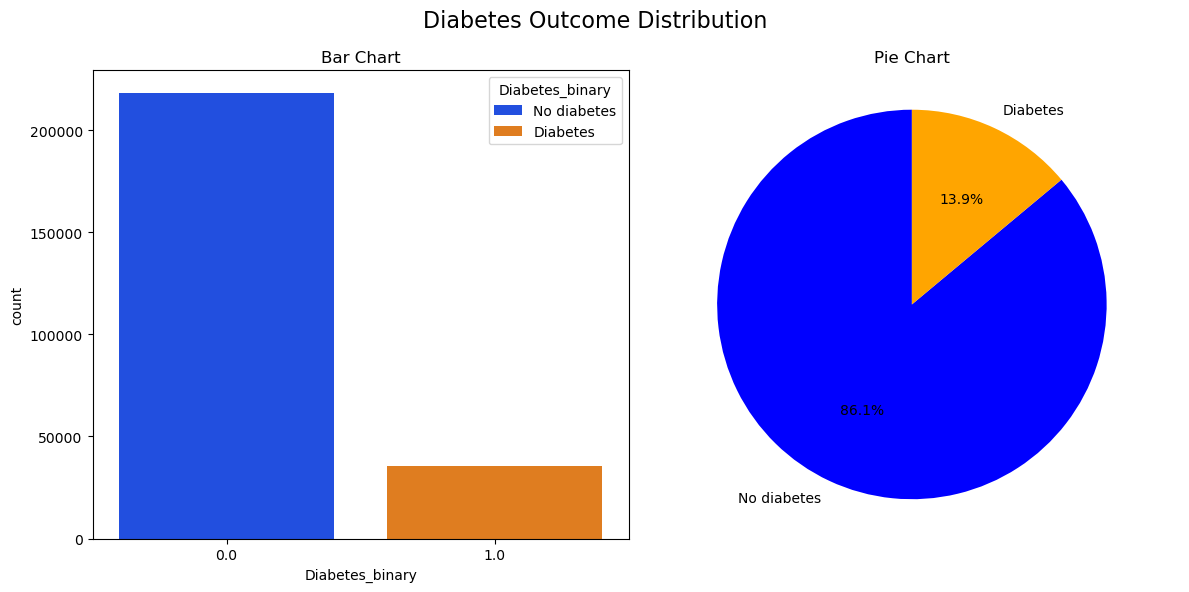

In [16]:
counts = diab_data['Diabetes_binary'].value_counts()
outcome_percent = round(counts / counts.sum() * 100, 1)

# Define legend labels
legend_labels = {0: 'No diabetes', 1: 'Diabetes'}
legend_labels_list = [legend_labels[i] for i in sorted(legend_labels.keys())]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart
sns.countplot(
    data=diab_data,
    x='Diabetes_binary',
    hue='Diabetes_binary',
    palette='bright',
    dodge=False,
    ax=axes[0]
)
axes[0].set_title('Bar Chart')

# Replace legend numbers with text
axes[0].legend(legend_labels_list, title="Diabetes_binary")

# Pie chart
axes[1].pie(
    counts,
    labels=legend_labels_list,
    colors=['blue', 'orange'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1].axis('equal')
axes[1].set_title('Pie Chart')

# Overall title
plt.suptitle('Diabetes Outcome Distribution', fontsize=16)
plt.tight_layout()
plt.show()

<details>
<summary> ▶ Compute distribution stats, skewness, and outliers for the numrical features using IQR </summary>
</detail>

In [17]:
rows = []
# Combine both lists
Numeric_features = numeric_features + ordinal_numeric_features 
for col in Numeric_features:
    s = diab_data[col].dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((s < lower) | (s > upper)).sum()
    skew = s.skew()
    kurt = s.kurtosis()

    rows.append({
        'feature': col,
        'min': s.min(),
        'q1': q1,
        'median': s.median(),
        'mean': s.mean(),
        'q3': q3,
        'max': s.max(),
        'std': s.std(),
        'skew': skew,
        'kurtosis': kurt,
        'iqr': iqr,
        'lower_bound': lower,
        'upper_bound': upper,
        'outlier_count': outliers,
        'outlier_pct': outliers / len(s) * 100
    })

summary = pd.DataFrame(rows)

# Round numeric columns
cols_to_round = ['min','q1','median','mean','q3','max','std','skew','kurtosis','iqr','lower_bound','upper_bound','outlier_pct']
summary_round = summary.copy()
summary_round[cols_to_round] = summary_round[cols_to_round].round(2)

print("Numeric & Ordinal Numeric features distribution: Skewness, Kurtosis and Outlier summary:")
print(summary_round[['feature','min','q1','median','mean','q3','max','skew','kurtosis','outlier_count','outlier_pct']])

Numeric & Ordinal Numeric features distribution: Skewness, Kurtosis and Outlier summary:
    feature   min    q1  median   mean    q3   max  skew  kurtosis  \
0       BMI  12.0  24.0    27.0  28.38  31.0  98.0  2.12     11.00   
1  MentHlth   0.0   0.0     0.0   3.18   2.0  30.0  2.72      6.44   
2  PhysHlth   0.0   0.0     0.0   4.24   3.0  30.0  2.21      3.50   

   outlier_count  outlier_pct  
0           9847         3.88  
1          36208        14.27  
2          40949        16.14  


<details> 
<summary> ▶ verify outliers in BMI</summary>
</details>

In [18]:
observations_below_lower_quartile = (diab_data["BMI"] > 41.5).sum()
print("count_below_lower_quartile:", observations_below_lower_quartile)

count_below_lower_quartile: 9820


In [19]:
observations_below_upper_quartile = (diab_data["BMI"] < 13.5).sum()
print("count_above_upper_quartile:", observations_below_upper_quartile)

count_above_upper_quartile: 27


<details> 
<summary> ▶ Define bounds for health-related features </summary>
</details>

In [20]:
bounds = {
    'MentHlth': (0, 30),
    'PhysHlth': (0, 30)
}

issues = []

for feature, (lower, upper) in bounds.items():
    if feature in diab_data.columns:
        series = diab_data[feature]
        count_below_0 = (series < 0).sum()
        count_above_upper = (series > upper).sum()

        issues.append({
            'feature': feature,
            'below_0': int(count_below_0),
            f'above_{upper}': int(count_above_upper)
        })

issues_df = pd.DataFrame(issues)

print("\n📊 contextual unrealistic value checks:")
print(issues_df)


📊 contextual unrealistic value checks:
    feature  below_0  above_30
0  MentHlth        0         0
1  PhysHlth        0         0


In [21]:
# Define plausible BMI bounds
BMI_Lower_Bound = 12
BMI_upper_Bound = 98

issues = []

if 'BMI' in diab_data.columns:
    bmi_series = diab_data['BMI']
    bmi_below_min = (bmi_series < BMI_Lower_Bound).sum()
    bmi_above_max = (bmi_series > BMI_upper_Bound).sum()

    issues.append({
        'feature': 'BMI',
        'below_min': int(bmi_below_min),
        'bmi_above_max': int(bmi_above_max)
    })

issues_df = pd.DataFrame(issues)

print("\n📊 Unrealistic or problematic value checks:")
print(issues_df)


📊 Unrealistic or problematic value checks:
  feature  below_min  bmi_above_max
0     BMI          0              0


<details>
<summary> ▶ Visualizations: Histograms and Boxplots for the Numeric features </summary>
</details>


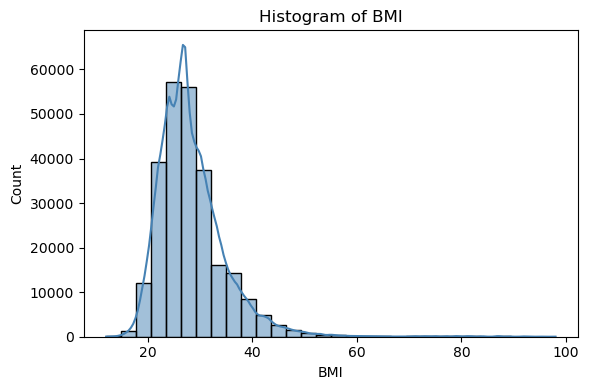

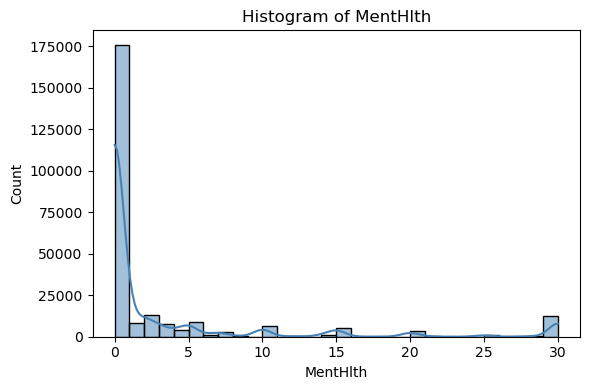

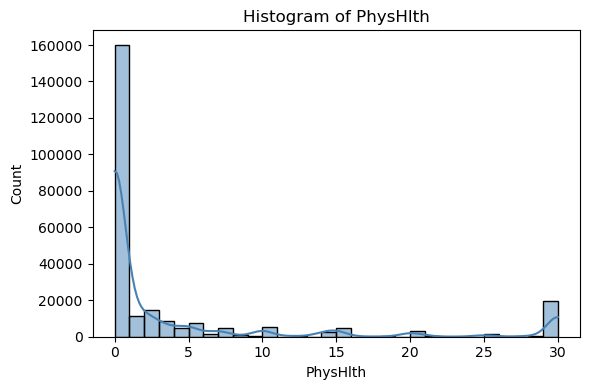

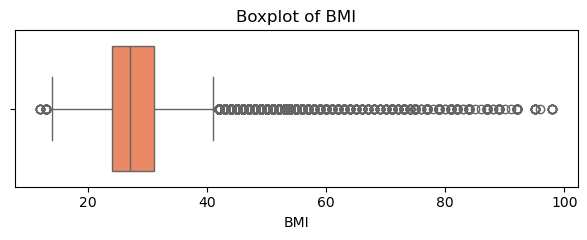

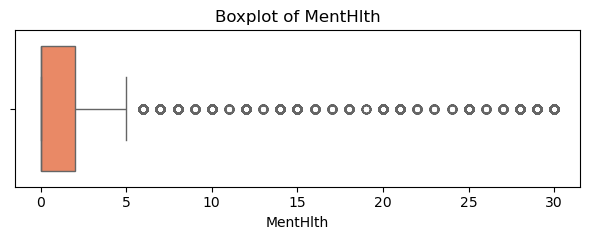

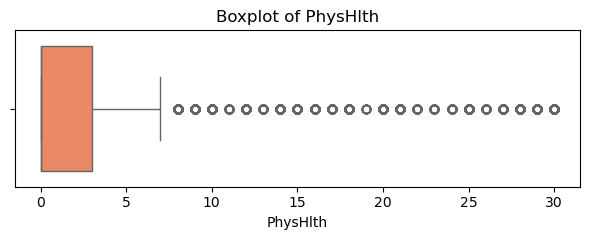

In [22]:
plot_cols = [c for c in Numeric_features if c in diab_data.columns]
for col in plot_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(diab_data[col], bins=30, kde=True, color='steelblue')
    plt.title('Histogram of ' + col)
    plt.tight_layout()
    plt.show()

for col in plot_cols:
    plt.figure(figsize=(6,2.5))
    sns.boxplot(x=diab_data[col], color='coral')
    plt.title('Boxplot of ' + col)
    plt.tight_layout()
    plt.show()

<details>
<summary> ▶ Visualizations: Bar plots for key categorical features vs diabetes rate </summary>
</details>

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


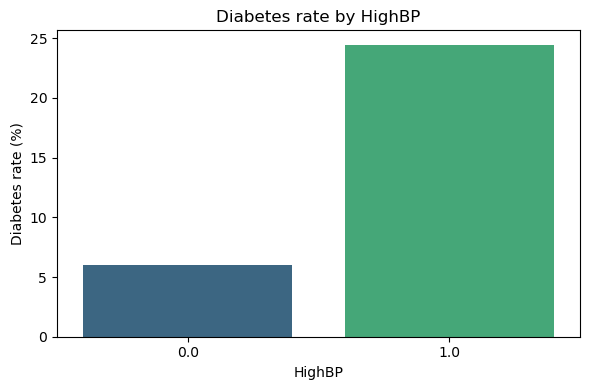

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


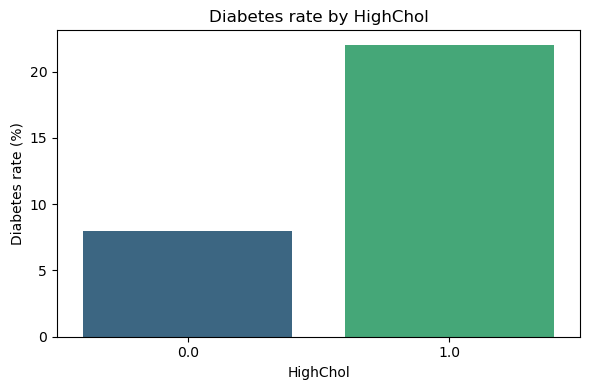

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


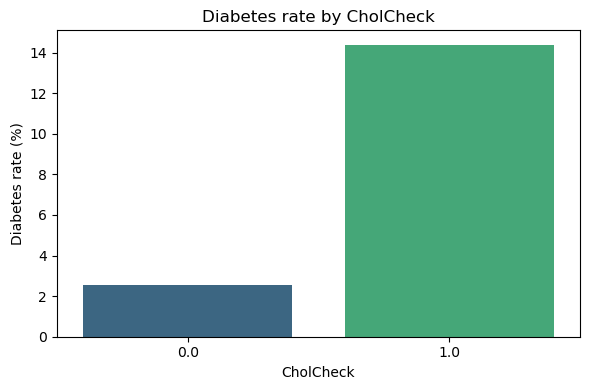

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


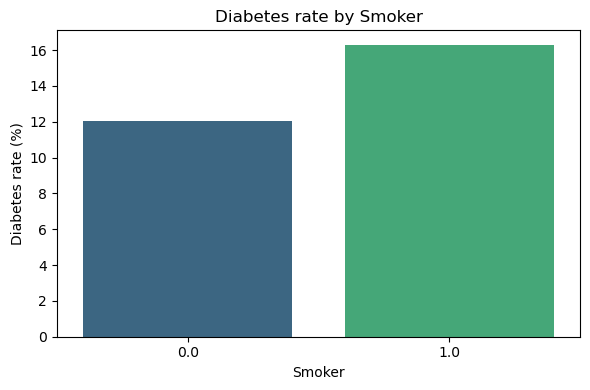

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


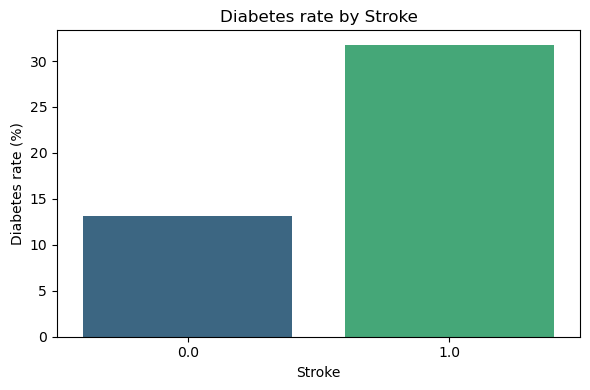

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


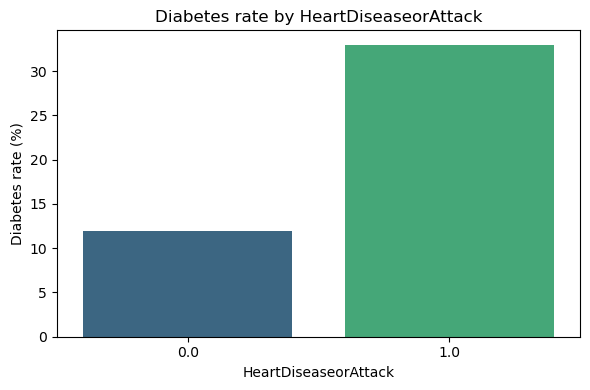

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


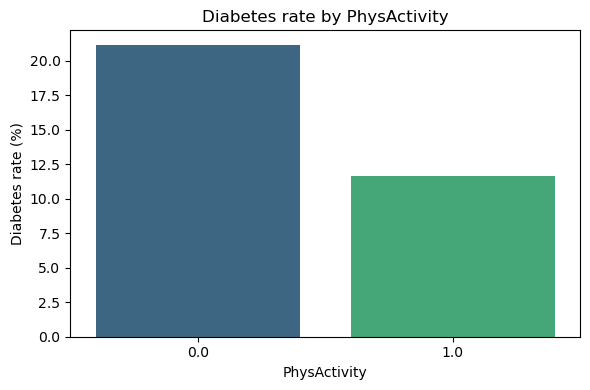

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


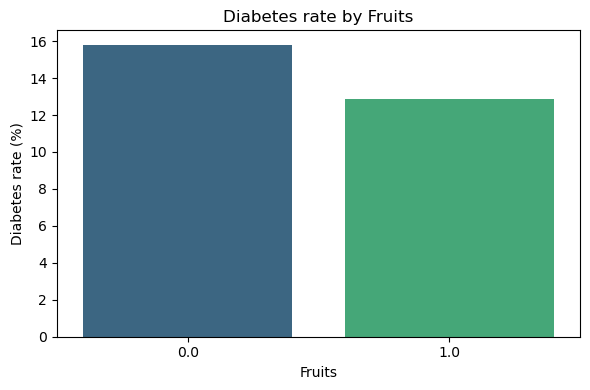

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


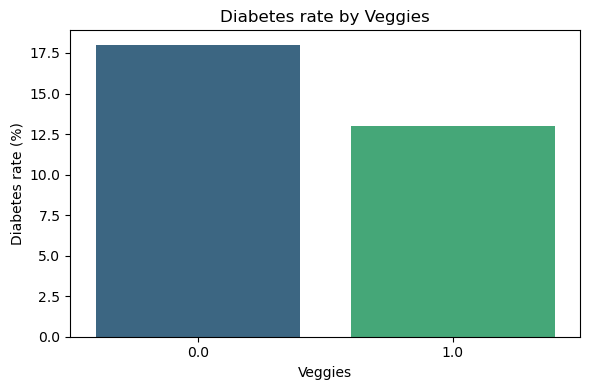

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


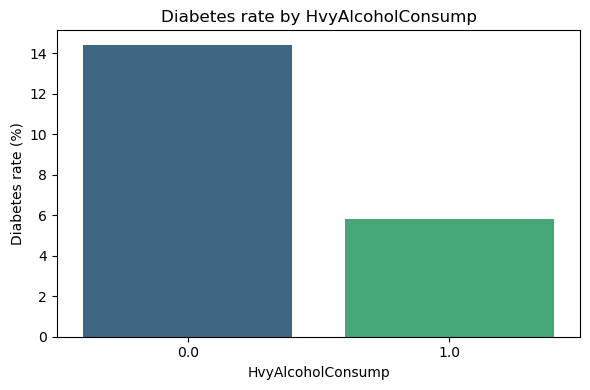

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


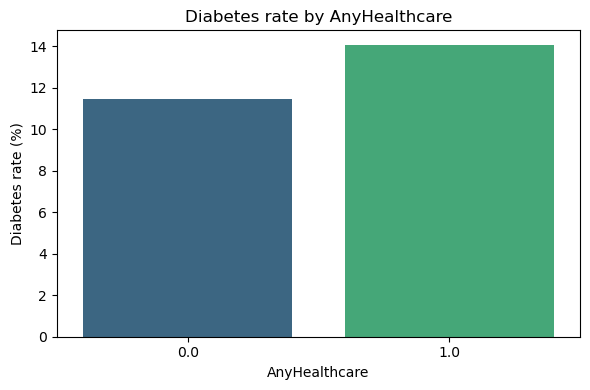

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


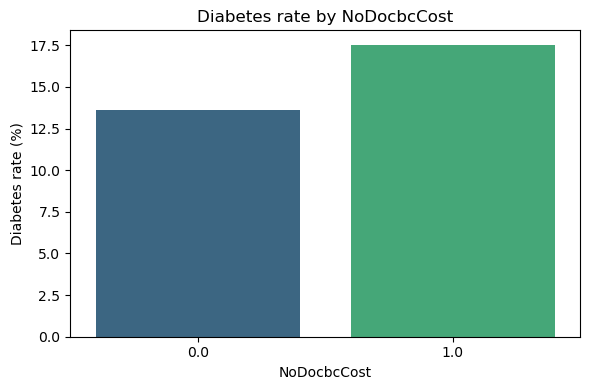

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


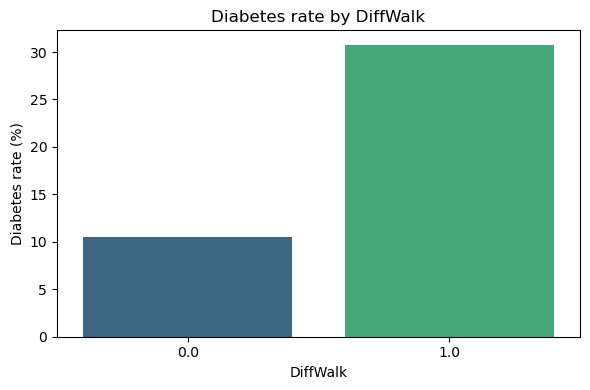

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


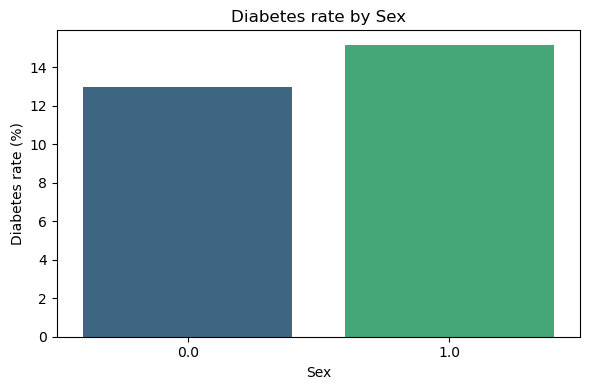

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


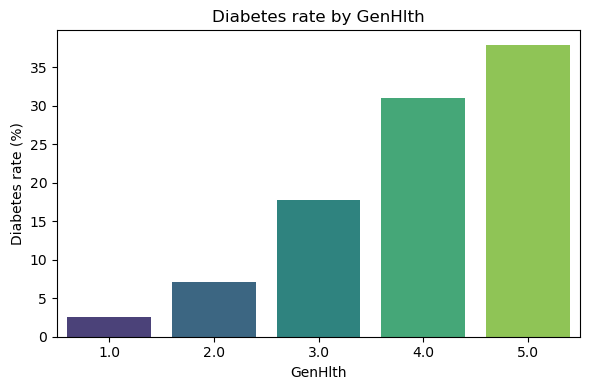

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


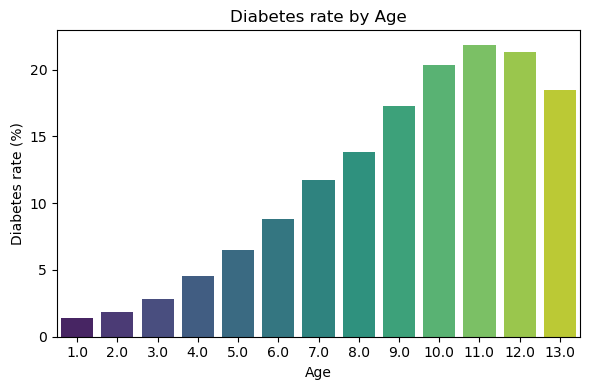

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


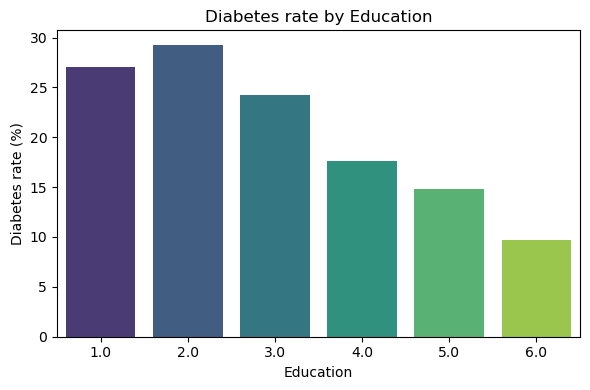

C:\Users\OWNER\AppData\Local\Temp\ipykernel_39364\20551651.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


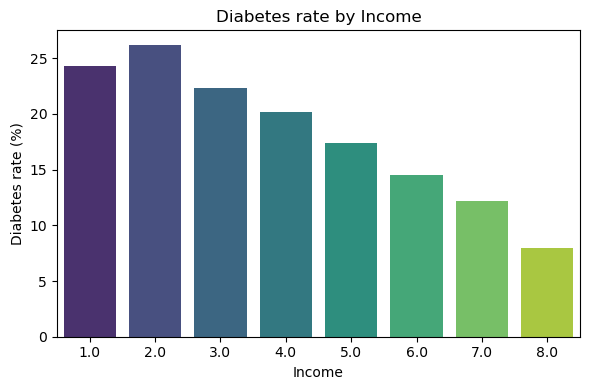

In [23]:
# Combine lists but exclude 'Outcome' (target)
features_to_plot = [f for f in (binary_features + ordinal_categoric_features) if f != 'Diabetes_binary']

for feat in features_to_plot:
    plt.figure(figsize=(6, 4))
    rates = diab_data.groupby(feat)['Diabetes_binary'].mean().reset_index()
    rates['DiabetesRate_pct'] = rates['Diabetes_binary'] * 100
    
    sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')
    plt.ylabel('Diabetes rate (%)')
    plt.title(f'Diabetes rate by {feat}')
    plt.tight_layout()
    plt.show()

<details>
<summary> ▶ Correlation of the numeric features with Diabetes_binary</summary>
</details>

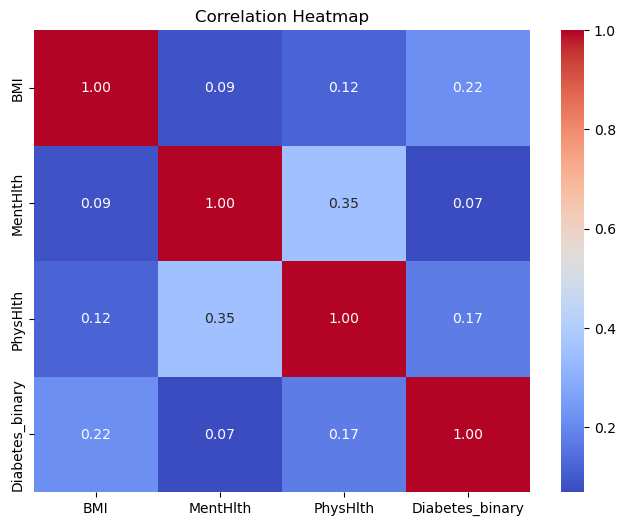

In [24]:
corr_matrix = diab_data[["BMI", "MentHlth", "PhysHlth", "Diabetes_binary"]].corr(method = "pearson")         
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

<details>
<summary> ▶ Association of binary features with outcome</summary>
</details>

In [25]:
from scipy.stats import chi2_contingency
for feature in binary_features:
    contingency = pd.crosstab(diab_data[feature], diab_data['Diabetes_binary'])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{feature}: p-value = {p:.4f}")

HighBP: p-value = 0.0000
HighChol: p-value = 0.0000
CholCheck: p-value = 0.0000
Smoker: p-value = 0.0000
Stroke: p-value = 0.0000
HeartDiseaseorAttack: p-value = 0.0000
PhysActivity: p-value = 0.0000
Fruits: p-value = 0.0000
Veggies: p-value = 0.0000
HvyAlcoholConsump: p-value = 0.0000
AnyHealthcare: p-value = 0.0000
NoDocbcCost: p-value = 0.0000
DiffWalk: p-value = 0.0000
Sex: p-value = 0.0000


<details>
<summary> ▶ Correlation of ordinal features with outcome</summary>
</details>

In [26]:
from scipy.stats import spearmanr
Ordinal = ordinal_categoric_features  + ordinal_numeric_features 
for feature in Ordinal:
    r, p = spearmanr(diab_data[feature], diab_data['Diabetes_binary'])
    print(f"{feature}: Spearman r = {r:.3f}, p = {p:.4f}")

GenHlth: Spearman r = 0.288, p = 0.0000
Age: Spearman r = 0.178, p = 0.0000
Education: Spearman r = -0.120, p = 0.0000
Income: Spearman r = -0.163, p = 0.0000
MentHlth: Spearman r = 0.040, p = 0.0000
PhysHlth: Spearman r = 0.157, p = 0.0000


<details>
<summary> ▶ Variance_inflation_factor: Check and interpretation of multicollinearity</summary>
🔍 VIF > 5 suggests moderate multicollinearity
🔥 VIF > 10 is considered problematic
</details>

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Ensure no categorical variables (encode them if needed)
X = diab_data.drop(columns=['Diabetes_binary'])  
X = add_constant(X)

# Calculate VIF
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

                 Feature         VIF
0                  const  115.971455
14               GenHlth    1.795892
16              PhysHlth    1.623288
17              DiffWalk    1.533902
21                Income    1.503931
19                   Age    1.349994
1                 HighBP    1.330684
20             Education    1.326390
15              MentHlth    1.239297
2               HighChol    1.173313
7   HeartDiseaseorAttack    1.171917
8           PhysActivity    1.157311
13           NoDocbcCost    1.144158
4                    BMI    1.139724
12         AnyHealthcare    1.113104
9                 Fruits    1.112533
10               Veggies    1.112385
5                 Smoker    1.091787
6                 Stroke    1.081070
18                   Sex    1.075060
3              CholCheck    1.032822
11     HvyAlcoholConsump    1.024059


## Data Pre-processing

In [28]:
# Drop duplicates
diab_data.drop_duplicates(inplace=True)

In [29]:
diab_data.shape

(229474, 22)

In [30]:
diab_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# ✅ Week 2: Feature Engineering & Preprocessing

<details>
<summary> ▶ BMI Categories</summary>
🔍 Underweight < 18.5
🔥 Normal 18.5 - 24.9 is
 overweight: > 25
</details>

## Converting data into appropriate type and encoding categorical features

<details>
<summary> ▶ Convert Binary Float Features to Integer</summary>
</details>

In [31]:
diab_data[binary_features] = diab_data[binary_features].astype(int)

<details>
<summary> ▶ Cap outliers using IQR</summary>
</details>

In [32]:
# MentHlth
Q1_mh = diab_data['MentHlth'].quantile(0.25)
Q3_mh = diab_data['MentHlth'].quantile(0.75)
IQR_mh = Q3_mh - Q1_mh
upper_mh = Q3_mh + 1.5 * IQR_mh
diab_data['MentHlth_capped'] = diab_data['MentHlth'].clip(upper=upper_mh)

# PhysHlth
Q1_ph = diab_data['PhysHlth'].quantile(0.25)
Q3_ph = diab_data['PhysHlth'].quantile(0.75)
IQR_ph = Q3_ph - Q1_ph
upper_ph = Q3_ph + 1.5 * IQR_ph
diab_data['PhysHlth_capped'] = diab_data['PhysHlth'].clip(upper=upper_ph)

<details>
<summary> ▶ Convert ordinal numeric features to ordered categories </summary>
</details>

In [33]:
diab_data['MentHlth_capped'] = diab_data['MentHlth_capped'].round().astype(int)
diab_data['PhysHlth_capped'] = diab_data['PhysHlth_capped'].round().astype(int)

# Convert to ordered categorical
diab_data['MentHlth_cat'] = pd.Categorical(diab_data['MentHlth_capped'], ordered=True)
diab_data['PhysHlth_cat'] = pd.Categorical(diab_data['PhysHlth_capped'], ordered=True)

In [34]:
## Ordinal Encoding
diab_data['MentHlth_ord'] = diab_data['MentHlth_cat'].cat.codes
diab_data['PhysHlth_ord'] = diab_data['PhysHlth_cat'].cat.codes

<details>
<summary> ▶ Convert ordinal categorical to ordered categories </summary>
</details>

In [35]:
# Cast from float to int
diab_data[ordinal_categoric_features] = diab_data[ordinal_categoric_features ].astype(int)

In [36]:
# Convert to ordered categorical first
diab_data['Income'] = pd.Categorical(diab_data['Income'], categories=list(range(1, 9)), ordered=True)
diab_data['Age'] = pd.Categorical(diab_data['Age'], categories=list(range(1, 14)), ordered=True)
diab_data['Education'] = pd.Categorical(diab_data['Education'], categories=list(range(1, 7)), ordered=True)
diab_data['GenHlth'] = pd.Categorical(diab_data['GenHlth'], categories=[1, 2, 3, 4, 5], ordered=True)

In [37]:
## Ordinal Encoding
diab_data['Income'] = diab_data['Income'].cat.codes
diab_data['Age'] = diab_data['Age'].cat.codes
diab_data['Education'] = diab_data['Education'].cat.codes
diab_data['GenHlth'] = diab_data['GenHlth'].cat.codes

In [38]:
# BMI capping
Q1_bmi = diab_data['BMI'].quantile(0.25)
Q3_bmi = diab_data['BMI'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi
upper_bmi = Q3_bmi + 1.5 * IQR_bmi

In [39]:
diab_data['BMI_capped'] = diab_data['BMI'].clip(upper=upper_bmi)

In [40]:
# Optional: Bin BMI After Capping
bmi_bins = [0, 18.5, 25, float('inf')]
bmi_labels = ['underweight', 'normal', 'overweight']

diab_data['BMI_category'] = pd.cut(diab_data['BMI_capped'], bins=bmi_bins, labels=bmi_labels)

In [41]:
diab_data['BMI_category'].value_counts()

BMI_category
overweight     152787
normal          73635
underweight      3052
Name: count, dtype: int64

In [42]:
diab_data.head(6)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,MentHlth_capped,PhysHlth_capped,MentHlth_cat,PhysHlth_cat,MentHlth_ord,PhysHlth_ord,BMI_capped,BMI_category
0,0.0,1,1,1,40.0,1,0,0,0,0,1,0,1,0,4,18.0,15.0,1,0,8,3,2,5,10,5,10,5,10,40.0,overweight
1,0.0,0,0,0,25.0,1,0,0,1,0,0,0,0,1,2,0.0,0.0,0,0,6,5,0,0,0,0,0,0,0,25.0,normal
2,0.0,1,1,1,28.0,0,0,0,0,1,0,0,1,1,4,30.0,30.0,1,0,8,3,7,5,10,5,10,5,10,28.0,overweight
3,0.0,1,0,1,27.0,0,0,0,1,1,1,0,1,0,1,0.0,0.0,0,0,10,2,5,0,0,0,0,0,0,27.0,overweight
4,0.0,1,1,1,24.0,0,0,0,1,1,1,0,1,0,1,3.0,0.0,0,0,10,4,3,3,0,3,0,3,0,24.0,normal
5,0.0,1,1,1,25.0,1,0,0,1,1,1,0,1,0,1,0.0,2.0,0,1,9,5,7,0,2,0,2,0,2,25.0,normal


In [43]:
diab_data.Education.nunique()

6

In [44]:
diab_data.shape

(229474, 30)

In [45]:
diab_data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'MentHlth_capped', 'PhysHlth_capped', 'MentHlth_cat', 'PhysHlth_cat',
       'MentHlth_ord', 'PhysHlth_ord', 'BMI_capped', 'BMI_category'],
      dtype='object')

In [46]:
diab_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,MentHlth_capped,PhysHlth_capped,MentHlth_cat,PhysHlth_cat,MentHlth_ord,PhysHlth_ord,BMI_capped,BMI_category
0,0.0,1,1,1,40.0,1,0,0,0,0,1,0,1,0,4,18.0,15.0,1,0,8,3,2,5,10,5,10,5,10,40.0,overweight
1,0.0,0,0,0,25.0,1,0,0,1,0,0,0,0,1,2,0.0,0.0,0,0,6,5,0,0,0,0,0,0,0,25.0,normal
2,0.0,1,1,1,28.0,0,0,0,0,1,0,0,1,1,4,30.0,30.0,1,0,8,3,7,5,10,5,10,5,10,28.0,overweight
3,0.0,1,0,1,27.0,0,0,0,1,1,1,0,1,0,1,0.0,0.0,0,0,10,2,5,0,0,0,0,0,0,27.0,overweight
4,0.0,1,1,1,24.0,0,0,0,1,1,1,0,1,0,1,3.0,0.0,0,0,10,4,3,3,0,3,0,3,0,24.0,normal


In [47]:
diab_data.drop(columns=['BMI', 'MentHlth', 'PhysHlth', 'MentHlth_capped', 'PhysHlth_capped', 'MentHlth_cat', 'PhysHlth_cat'], inplace=True)

In [48]:
diab_data.shape

(229474, 23)

In [49]:
diab_data.dtypes

Diabetes_binary          float64
HighBP                     int32
HighChol                   int32
CholCheck                  int32
Smoker                     int32
Stroke                     int32
HeartDiseaseorAttack       int32
PhysActivity               int32
Fruits                     int32
Veggies                    int32
HvyAlcoholConsump          int32
AnyHealthcare              int32
NoDocbcCost                int32
GenHlth                     int8
DiffWalk                   int32
Sex                        int32
Age                         int8
Education                   int8
Income                      int8
MentHlth_ord                int8
PhysHlth_ord                int8
BMI_capped               float64
BMI_category            category
dtype: object

In [50]:
diab_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentHlth_ord,PhysHlth_ord,BMI_capped,BMI_category
0,0.0,1,1,1,1,0,0,0,0,1,0,1,0,4,1,0,8,3,2,5,10,40.0,overweight
1,0.0,0,0,0,1,0,0,1,0,0,0,0,1,2,0,0,6,5,0,0,0,25.0,normal
2,0.0,1,1,1,0,0,0,0,1,0,0,1,1,4,1,0,8,3,7,5,10,28.0,overweight
3,0.0,1,0,1,0,0,0,1,1,1,0,1,0,1,0,0,10,2,5,0,0,27.0,overweight
4,0.0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,0,10,4,3,3,0,24.0,normal


<details>
<summary> ▶ Check for predictive power of 'BMI_capped' and BMI_category' </summary>
</details>

In [51]:
from sklearn.feature_selection import mutual_info_classif
X_bmi = diab_data[['BMI_capped']]
X_cat = pd.get_dummies(diab_data[['BMI_category']], drop_first=True)
y = diab_data['Diabetes_binary']

mi_capped = mutual_info_classif(X_bmi, y)[0]
mi_category = mutual_info_classif(X_cat, y).sum()

print(f"MI (BMI_capped): {mi_capped:.4f}")
print(f"MI (BMI_category): {mi_category:.4f}")

MI (BMI_capped): 0.0272
MI (BMI_category): 0.0739


<details>
<summary> ▶ Bmi category encoding </summary>
</details>

In [52]:
from pandas.api.types import CategoricalDtype
bmi_order = CategoricalDtype(
    categories=['underweight', 'normal', 'overweight'],
    ordered=True
)

diab_data["BMI_category_ord"] = diab_data["BMI_category"].astype(bmi_order).cat.codes

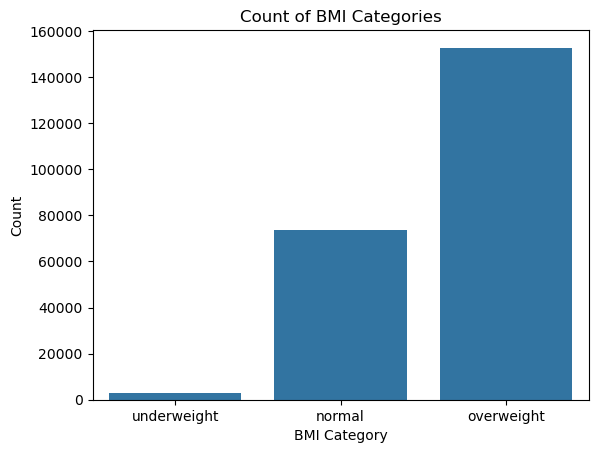

In [53]:
# Create a count plot for the original BMI_category column
sns.countplot(x="BMI_category", data=diab_data, order=['underweight', 'normal', 'overweight'])
plt.title("Count of BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()

In [54]:
diab_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentHlth_ord,PhysHlth_ord,BMI_capped,BMI_category,BMI_category_ord
0,0.0,1,1,1,1,0,0,0,0,1,0,1,0,4,1,0,8,3,2,5,10,40.0,overweight,2
1,0.0,0,0,0,1,0,0,1,0,0,0,0,1,2,0,0,6,5,0,0,0,25.0,normal,1
2,0.0,1,1,1,0,0,0,0,1,0,0,1,1,4,1,0,8,3,7,5,10,28.0,overweight,2
3,0.0,1,0,1,0,0,0,1,1,1,0,1,0,1,0,0,10,2,5,0,0,27.0,overweight,2
4,0.0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,0,10,4,3,3,0,24.0,normal,1


In [55]:
diab_data.drop(columns=['BMI_capped', 'BMI_category'], inplace=True) # based on the mutual info regression outcome

In [56]:
diab_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentHlth_ord,PhysHlth_ord,BMI_category_ord
0,0.0,1,1,1,1,0,0,0,0,1,0,1,0,4,1,0,8,3,2,5,10,2
1,0.0,0,0,0,1,0,0,1,0,0,0,0,1,2,0,0,6,5,0,0,0,1
2,0.0,1,1,1,0,0,0,0,1,0,0,1,1,4,1,0,8,3,7,5,10,2
3,0.0,1,0,1,0,0,0,1,1,1,0,1,0,1,0,0,10,2,5,0,0,2
4,0.0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,0,10,4,3,3,0,1


In [57]:
diab_data.PhysHlth_ord.min()

0

In [58]:
diab_data.PhysHlth_ord.max()

10

In [59]:
diab_data.shape

(229474, 22)

<details>
<summary> ▶ feature importance ranking using Mutual Information (MI) </summary>
</details>

In [60]:
from sklearn.feature_selection import mutual_info_classif

target = 'Diabetes_binary'
X = diab_data.drop(columns=[target]).copy()
y = diab_data[target].astype('int8')


discrete_cols = ["GenHlth", "Age", "Education", "Income", "MentHlth_ord", "PhysHlth_ord", "BMI_category_ord"]
discrete_mask = X.columns.isin(discrete_cols)

mi_scores = mutual_info_classif(X.values, y.values,
                                discrete_features=discrete_mask,
                                random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values()


In [61]:
print(mi_series)

NoDocbcCost             0.001339
MentHlth_ord            0.001489
HvyAlcoholConsump       0.002992
Stroke                  0.005170
Education               0.005192
Income                  0.009833
PhysHlth_ord            0.011049
HeartDiseaseorAttack    0.013767
BMI_category_ord        0.014189
Sex                     0.020687
DiffWalk                0.020688
Age                     0.021269
Smoker                  0.025522
Fruits                  0.034849
Veggies                 0.037102
HighChol                0.038255
GenHlth                 0.039276
PhysActivity            0.041988
CholCheck               0.046407
AnyHealthcare           0.048503
HighBP                  0.052065
dtype: float64


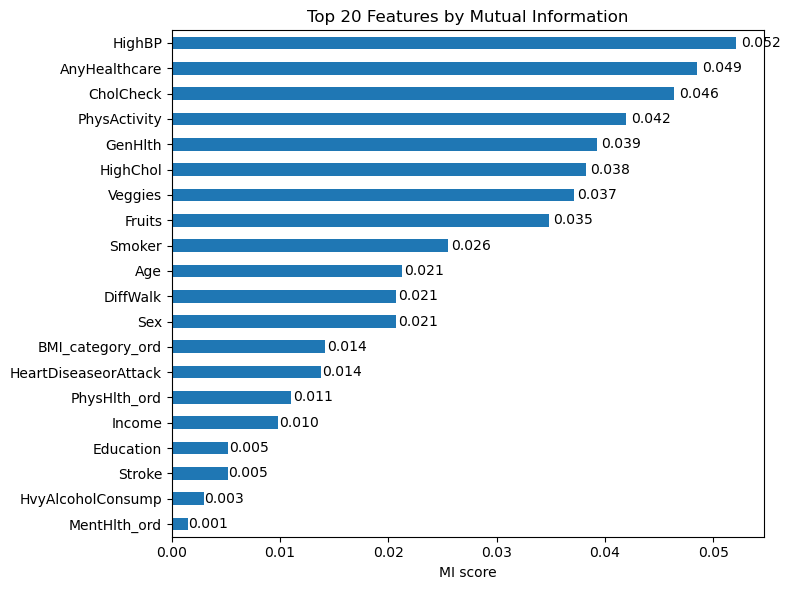

In [62]:
# Visualise it
top_features = mi_series.tail(20)
plt.figure(figsize=(8,6))
ax = top_features.plot(kind='barh')
for i, (feat, score) in enumerate(top_features.items()):
    ax.text(score*1.01, i, f"{score:.3f}", va='center')
plt.title('Top 20 Features by Mutual Information')
plt.xlabel('MI score')
plt.tight_layout()
plt.show()

In [63]:

# Target entropy H(Y) in nats
p = y.mean()
H = -(p*np.log(p) + (1-p)*np.log(1-p))
mi_norm = (mi_series / H).sort_values()  # fraction of H(Y)
print(mi_norm.tail(10))  # top 10 as a fraction of Y’s entropy


Age              0.049718
Smoker           0.059661
Fruits           0.081463
Veggies          0.086731
HighChol         0.089426
GenHlth          0.091812
PhysActivity     0.098153
CholCheck        0.108483
AnyHealthcare    0.113381
HighBP           0.121709
dtype: float64


In [64]:
# Base lists
binary = ['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack',
          'PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare',
          'NoDocbcCost','DiffWalk','Sex']
ord_cat = ['GenHlth','Age','Education','Income']

# We prefer originals; fall back to binned/ordinal names if originals are missing
aliases = {
    'BMI':       ['BMI','BMI_value','BMI_category','BMI_category_ord'],
    'MentHlth':  ['MentHlth','MentHlth_ord','MentHlth_cat'],
    'PhysHlth':  ['PhysHlth','PhysHlth_ord','PhysHlth_cat'],
}

def pick_name(base):
    for cand in aliases[base]:
        if cand in diab_data.columns:
            return cand
    return None

bmi_col      = pick_name('BMI')
menthlth_col = pick_name('MentHlth')
physhlth_col = pick_name('PhysHlth')

missing = [k for k,v in [('BMI',bmi_col),('MentHlth',menthlth_col),('PhysHlth',physhlth_col)] if v is None]
if missing:
    raise KeyError(f"Could not find columns for: {missing}. Check your DataFrame columns.")

# Build X using whatever exists
use_cols = binary + ord_cat + [bmi_col, menthlth_col, physhlth_col]
target = 'Diabetes_binary'
X2 = diab_data[use_cols].copy()
y2 = diab_data[target].astype(int)

# Discrete features for MI:
# - binaries and ordinal categoricals are discrete
# - if we ended up with *binned* versions of BMI/MentHlth/PhysHlth (i.e., name != original),
#   treat those as discrete; otherwise treat as continuous.
discrete_set = set(binary + ord_cat)
if bmi_col != 'BMI':             discrete_set.add(bmi_col)
if menthlth_col != 'MentHlth':   discrete_set.add(menthlth_col)
if physhlth_col != 'PhysHlth':   discrete_set.add(physhlth_col)

discrete_mask = X2.columns.isin(discrete_set)

from sklearn.feature_selection import mutual_info_classif
mi2 = pd.Series(
    mutual_info_classif(X2.values, y2.values, discrete_features=discrete_mask, random_state=42),
    index=X2.columns
).sort_values()
mi2.tail(15)


MentHlth_ord            0.001489
HvyAlcoholConsump       0.002690
CholCheck               0.003756
Stroke                  0.004021
PhysActivity            0.004768
Education               0.005192
Income                  0.009833
PhysHlth_ord            0.011049
HeartDiseaseorAttack    0.011644
BMI_category_ord        0.014189
DiffWalk                0.018200
HighChol                0.019016
Age                     0.021269
HighBP                  0.033101
GenHlth                 0.039276
dtype: float64

In [65]:
p = y.mean()
H = -(p*np.log(p) + (1-p)*np.log(1-p))  # entropy of Outcome in nats
(mi_series / H).sort_values().tail(15)   # fraction of H(Outcome)


PhysHlth_ord            0.025828
HeartDiseaseorAttack    0.032183
BMI_category_ord        0.033169
Sex                     0.048358
DiffWalk                0.048360
Age                     0.049718
Smoker                  0.059661
Fruits                  0.081463
Veggies                 0.086731
HighChol                0.089426
GenHlth                 0.091812
PhysActivity            0.098153
CholCheck               0.108483
AnyHealthcare           0.113381
HighBP                  0.121709
dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

X = diab_data.drop(columns=['Diabetes_binary'])
y = diab_data['Diabetes_binary'].astype(int)

X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, random_state=42)
rf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
rf.fit(X_tr, y_tr)

r = permutation_importance(rf, X_te, y_te, n_repeats=10, random_state=42, n_jobs=-1)
pi = pd.Series(r.importances_mean, index=X_te.columns).sort_values()
pi.tail(15)


Veggies                -0.000767
Sex                    -0.000725
PhysActivity           -0.000568
Fruits                 -0.000455
AnyHealthcare          -0.000410
NoDocbcCost            -0.000319
HeartDiseaseorAttack   -0.000126
CholCheck              -0.000021
DiffWalk                0.000078
Stroke                  0.000195
HvyAlcoholConsump       0.000675
HighChol                0.000955
HighBP                  0.000980
BMI_category_ord        0.002154
GenHlth                 0.005058
dtype: float64

In [72]:
# Train test split
# Perform an 80/20 split with stratification
X_train, y_train, X_test, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=diab_data["Diabetes_binary"],
    random_state=42  # for reproducibility
)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (183579, 21)
X_test shape: (183579,)
y_train shape: (45895, 21)
y_test shape: (45895,)


In [68]:
# Feature Scaling

In [69]:
# Model Traingin